# Unsupervised Learning

## Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

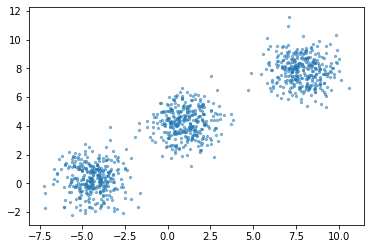

In [3]:
X,y = make_blobs(n_features=2, n_samples=1000, centers=3, cluster_std=1, random_state=3)
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

In [4]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances


In [5]:
X = [[0, 1], [1, 1]]
euclidean_distances(X, X)

array([[0., 1.],
       [1., 0.]])

In [6]:
euclidean_distances(X, [[0,0]])

array([[1.        ],
       [1.41421356]])

In [7]:
cosine_distances(X,X)

array([[0.        , 0.29289322],
       [0.29289322, 0.        ]])

In [8]:
manhattan_distances(X,X)

array([[0., 1.],
       [1., 0.]])

## KMeans

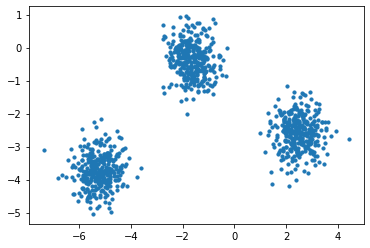

In [9]:
from sklearn.datasets import make_blobs, make_moons
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=.5)
plt.scatter(X[:,0], X[:,1],s=10)

In [14]:
from sklearn.cluster import KMeans, MeanShift
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

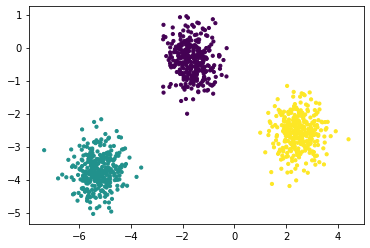

In [15]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))


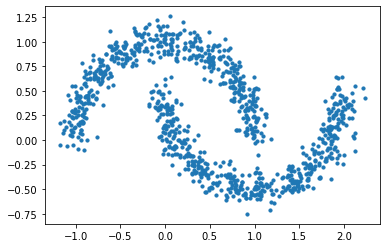

In [16]:
X, y = make_moons(n_samples=1000, noise=.09)
plt.scatter(X[:,0], X[:,1],s=10)

In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

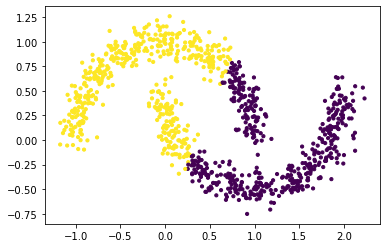

In [18]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))


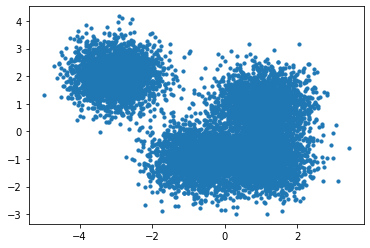

In [19]:
kmeans = KMeans(n_clusters=4)
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1],s=10)

In [20]:
kmeans = KMeans(n_clusters=4)
ms = MeanShift()
kmeans.fit(X)

KMeans(n_clusters=4)

In [21]:
ms.fit(X)


MeanShift()

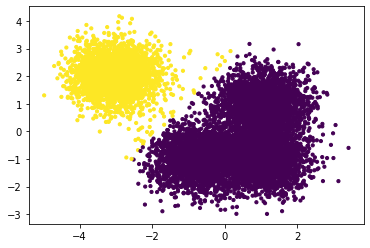

In [22]:
plt.scatter(X[:,0], X[:,1],s=10, c=ms.predict(X))


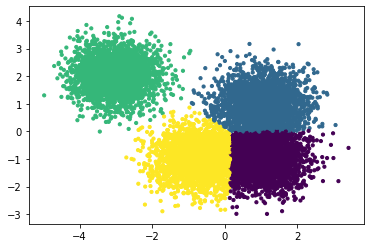

In [23]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))


## Hierarchial Clustering

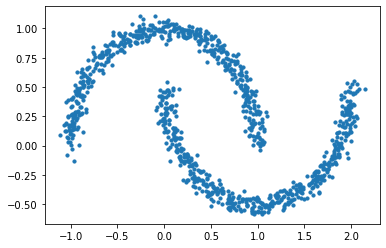

In [24]:
X, y = make_moons(n_samples=1000, noise=.05)
plt.scatter(X[:,0], X[:,1],s=10)

In [25]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(linkage='single')
agc.fit(X)

AgglomerativeClustering(linkage='single')

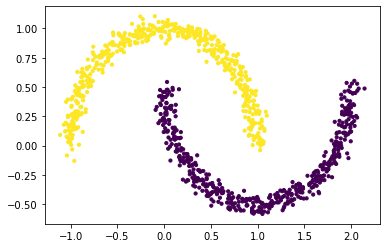

In [26]:
plt.scatter(X[:,0], X[:,1],s=10,c=agc.labels_)


## Density Based Clustering - DBSCAN

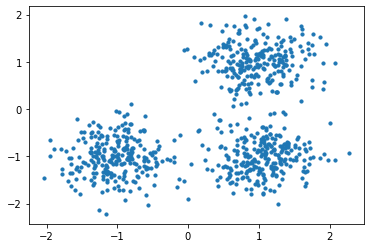

In [27]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0], X[:,1],s=10)

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

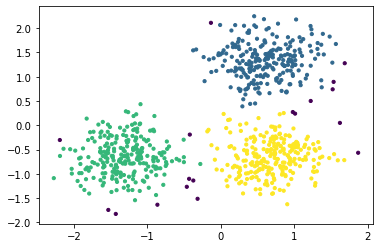

In [29]:
plt.scatter(X[:,0], X[:,1],s=10,c=labels)


In [30]:
##Measuring Performance of Clusters

from sklearn.metrics.cluster import completeness_score
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

In [31]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

In [32]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))


1.0


In [33]:
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])


1.0

In [34]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])


0.9999999999999999

In [35]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])


1.0